In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from IPython.display import Image

In [4]:
df = pd.read_csv('https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv', sep=',')
df.head(5) 


,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


카디널리티가 많기 때문에 이대로 계산할 수 없다.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


전체 315개가 있는데 각 열 마다 결측치가 표시된다.

In [8]:
df.head(15)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


In [10]:
for i in range(6):
    items=df[str(i)].unique()
    print("[",i,"]",items)

[ 0 ] ['Bread' 'Cheese' 'Meat' 'Eggs' 'Wine' 'Bagel' 'Pencil' 'Diaper' 'Milk']
[ 1 ] ['Wine' 'Cheese' 'Meat' 'Pencil' 'Bread' 'Diaper' 'Eggs' nan 'Bagel'
 'Milk']
[ 2 ] ['Eggs' 'Meat' 'Wine' 'Milk' 'Cheese' 'Diaper' 'Pencil' nan 'Bagel'
 'Bread']
[ 3 ] ['Meat' 'Diaper' 'Milk' nan 'Pencil' 'Cheese' 'Bread' 'Bagel' 'Wine'
 'Eggs']
[ 4 ] ['Cheese' 'Wine' nan 'Milk' 'Diaper' 'Pencil' 'Meat' 'Bagel' 'Bread'
 'Eggs']
[ 5 ] ['Pencil' 'Milk' nan 'Diaper' 'Eggs' 'Wine' 'Cheese' 'Bagel' 'Meat'
 'Bread']


나온 값들이 칼럼의 나머지 값들의 super set이다

In [11]:
items=(df['0'].unique())
items
#0번째 칼럼의 슈퍼셋과 다른 칼럼의 슈퍼셋과 다른 것이 없다 
# -> 0번쨰 해당되는 칼럼의 카디널리티가 전체의 카디널리티다

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [12]:
encoded_vals=[]

def custom_one_hot_encoding(df):
    #샘플마다 반복문이 돌면서 encoded_val에 하나씩 덧붙여진다
    for index, row in df.iterrows():
        labels={}
        total_items=set(items)
        #전체 아이템의 슈퍼셋
        selected_item=set(row)
        #특정 로우에 실제로 있는 것(sample)
        uncommon=list(total_items-selected_item)
        commons=list(total_items.intersection(row))

        for uc in uncommon:
            labels[uc]=0
        for com in commons:
            labels[com]=1
        encoded_vals.append(labels)
    encoded_vals[0]
    ohe_df=pd.DataFrame(encoded_vals)

    return ohe_df

ohe_df=custom_one_hot_encoding(df)






In [13]:
ohe_df.head(10)

,Bagel,Milk,Wine,Eggs,Cheese,Pencil,Meat,Bread,Diaper
0,0,0,1,1,1,1,1,1,1
1,0,1,1,0,1,1,1,1,1
2,0,1,1,1,1,0,1,0,0
3,0,1,1,1,1,0,1,0,0
4,0,0,1,0,0,1,1,0,0
5,1,1,1,1,0,1,0,1,1
6,0,0,1,1,1,1,0,0,0
7,1,1,0,0,0,1,0,1,1
8,0,1,1,1,1,0,0,1,1
9,1,0,1,1,1,1,1,0,1


In [14]:
for i,min_sup in enumerate([0.3,0.5,0.7]):
    freq_items=apriori(ohe_df,min_support=min_sup,use_colnames=True,max_len=None,verbose=0,low_memory=False)
    print(freq_items)
    print("\n")

     support        itemsets
0   0.425397         (Bagel)
1   0.501587          (Milk)
2   0.438095          (Wine)
3   0.438095          (Eggs)
4   0.501587        (Cheese)
5   0.361905        (Pencil)
6   0.476190          (Meat)
7   0.504762         (Bread)
8   0.406349        (Diaper)
9   0.304762  (Cheese, Milk)
10  0.323810  (Cheese, Meat)


    support  itemsets
0  0.501587    (Milk)
1  0.501587  (Cheese)
2  0.504762   (Bread)


Empty DataFrame
Columns: [support, itemsets]
Index: []




In [17]:
freq_items1=apriori(ohe_df,min_support=0.15,use_colnames=True,max_len=None,verbose=0,low_memory=False)
print("규칙 수 : ",len(freq_items1),"\n")
print(freq_items1)
#아이템이 하나인 것은 큰 의미가 없기 때문에, 최소 지지도를 내려서 더 넓은 범위에서 찾아봄

규칙 수 :  54 

     support                    itemsets
0   0.425397                     (Bagel)
1   0.501587                      (Milk)
2   0.438095                      (Wine)
3   0.438095                      (Eggs)
4   0.501587                    (Cheese)
5   0.361905                    (Pencil)
6   0.476190                      (Meat)
7   0.504762                     (Bread)
8   0.406349                    (Diaper)
9   0.225397               (Bagel, Milk)
10  0.171429               (Bagel, Wine)
11  0.152381               (Bagel, Eggs)
12  0.193651             (Bagel, Cheese)
13  0.158730             (Bagel, Pencil)
14  0.190476               (Bagel, Meat)
15  0.279365              (Bagel, Bread)
16  0.184127             (Bagel, Diaper)
17  0.219048                (Wine, Milk)
18  0.244444                (Milk, Eggs)
19  0.304762              (Cheese, Milk)
20  0.171429              (Milk, Pencil)
21  0.244444                (Milk, Meat)
22  0.279365               (Milk, Bread)
23 

In [24]:
rules=association_rules(freq_items1,metric="confidence",min_threshold=0.55)
rules
#1열(antecedents)이 사전, 2열(consequents)이 사후

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Bread),(Bagel),0.504762,0.425397,0.279365,0.553459,1.301042,0.064641,1.286787
2,(Eggs),(Milk),0.438095,0.501587,0.244444,0.557971,1.112411,0.024701,1.127557
3,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
4,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
5,(Milk),(Bread),0.501587,0.504762,0.279365,0.556962,1.103415,0.026183,1.117823
6,(Bread),(Milk),0.504762,0.501587,0.279365,0.553459,1.103415,0.026183,1.116164
7,(Wine),(Eggs),0.438095,0.438095,0.241270,0.550725,1.257089,0.049342,1.250691
8,(Eggs),(Wine),0.438095,0.438095,0.241270,0.550725,1.257089,0.049342,1.250691
9,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754


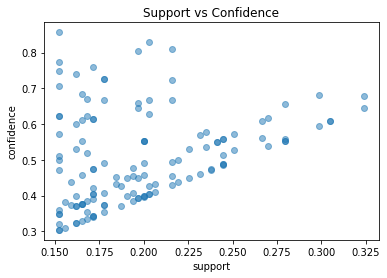

In [19]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5) # X축, Y축의 값, 그리고 alpha는 색의 투명도
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [25]:
rules2=association_rules(freq_items1,metric="lift",min_threshold=1.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Cheese, Meat)","(Milk, Eggs)",0.323810,0.244444,0.152381,0.470588,1.925134,0.073228,1.427160
1,"(Cheese, Eggs)","(Milk, Meat)",0.298413,0.244444,0.152381,0.510638,2.088975,0.079436,1.543961
2,"(Milk, Meat)","(Cheese, Eggs)",0.244444,0.298413,0.152381,0.623377,2.088975,0.079436,1.862835
3,"(Milk, Eggs)","(Cheese, Meat)",0.244444,0.323810,0.152381,0.623377,1.925134,0.073228,1.795402


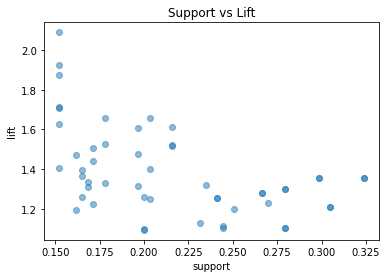

In [26]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

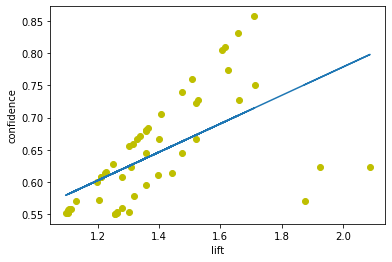

In [27]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))
#리프트와 컨피던스는 선형적이고 양의 상관관계가 있다